# LAB 2 DATA ANALYSYS

## 1. Зниження розмірності і візуалізація даних

In [11]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from seaborn import heatmap
from sklearn.manifold import TSNE

random_state = 69
test_size = 0.3

Вирішив спробувати для зниження розмірності датасет з 1 лаби - перевівши його для простоти в 2 змінні [waterQuality1.csv](https://www.kaggle.com/datasets/mssmartypants/water-quality/)

In [12]:
data = pd.read_csv('../waterQuality1.csv')
print(data.head())

   aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65    9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32   21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01   14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36   11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92   24.33     0.03    0.20    0.006        2.67      0.69    0.57   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   

   radium  selenium  silver  uranium  is_saf

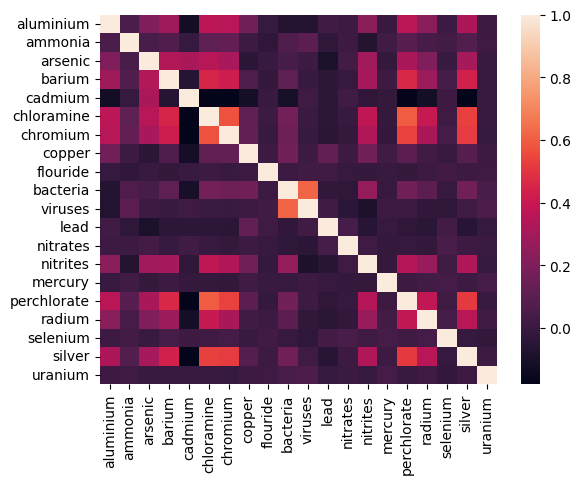

In [13]:
y_name = 'is_safe'
data[y_name] = pd.to_numeric(data[y_name], errors='coerce')
data = data.dropna(subset=[y_name])
x_data = data.drop(y_name, axis=1)
x_name = x_data.columns

for i in x_name:
    data[i] = pd.to_numeric(data[i], errors='coerce')
    mean_value = data[i].mean()
    std_dev = data[i].std()
    lower_bound = mean_value - 3 * std_dev
    upper_bound = mean_value + 3 * std_dev
    data = data[(data[i] >= lower_bound) & (data[i] <= upper_bound)]

x_data = data.drop(y_name, axis=1)
scaler = StandardScaler()
data_scaled_arr = scaler.fit_transform(x_data)
data_scaled = data.copy()
data_scaled[x_name] = data_scaled_arr
data_scaled[y_name] = data_scaled[y_name].astype(int)

X = data_scaled.drop(y_name, axis=1)

heatmap(X.corr(numeric_only=True), annot=False)
plt.show()

### PCA - спрощення до двохмірного датасету

In [14]:
c = data_scaled[y_name]
X = data_scaled.drop(y_name, axis=1)

#|print(X)
pca = PCA(n_components=2, random_state=random_state)
X_2d = pca.fit_transform(X)
pca_df = pd.DataFrame(data=X_2d, columns=['PC1', 'PC2'])

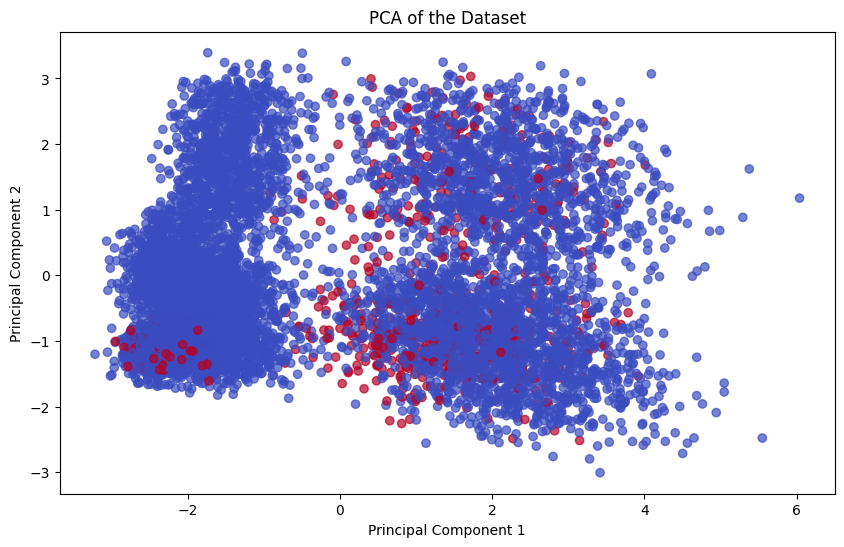

Explained Variance by PCA components: [0.20671463 0.08373781]


In [15]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, c=c, cmap='coolwarm')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of the Dataset')
plt.show()

explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance by PCA components: {explained_variance}')

слабенько воно передало властивості датасету, не сильно підходить для цього

### TSNE - спрощення до двохмірного датасету

In [16]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=random_state)
X_tsne = tsne.fit_transform(X)
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df[y_name] = c

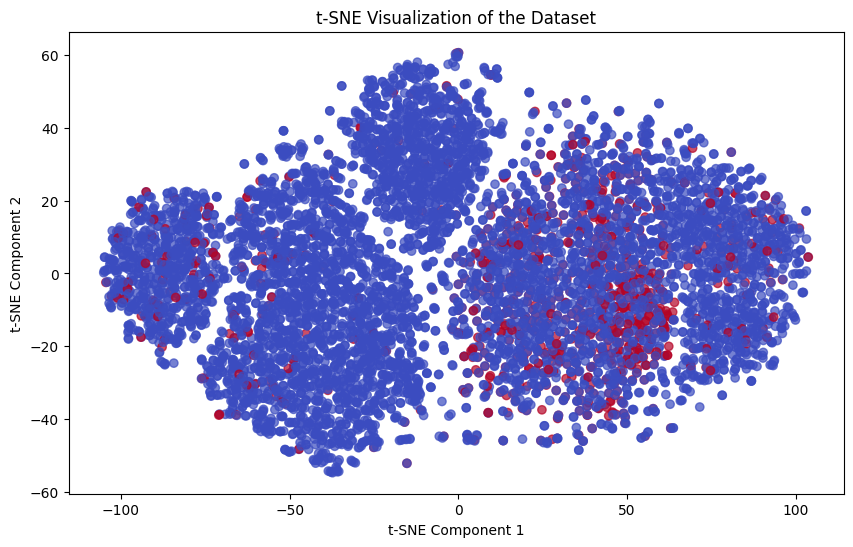

In [28]:
#Plot the t-SNE transformed data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=tsne_df[y_name], cmap='coolwarm', alpha=0.7)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of the Dataset')
plt.show()

## 2. Кластерний аналіз

In [18]:
from skimage import io
from skimage.transform import resize

Використовуватиму картинку для кластерного аналізу
<img src="photo.jpg" alt="Alt text">

In [19]:
def kmeans_image_quantization(img, n_colors):
    # Зберігаємо оригінальні розміри
    original_shape = img.shape
    
    # 2D масив
    img_reshaped = img.reshape(-1, 3)
    
    # алгоритм K-Means
    kmeans = KMeans(n_clusters=n_colors, random_state=42, n_init=10)
    kmeans.fit(img_reshaped)
    
    # Заміна пікселів на середні кольори кластерів
    new_colors = kmeans.cluster_centers_.astype(int)
    labels = kmeans.labels_
    img_quantized = new_colors[labels].reshape(original_shape)
    
    return img_quantized

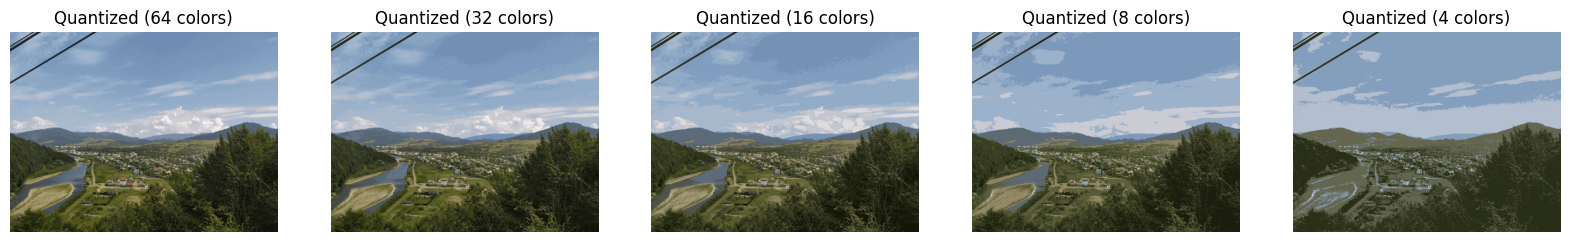

In [20]:
image_path = 'photo.jpg' 
img = io.imread(image_path)

# квантування зображення
quantized_64 = kmeans_image_quantization(img, 64)
quantized_32 = kmeans_image_quantization(img, 32)
quantized_16 = kmeans_image_quantization(img, 16)
quantized_8 = kmeans_image_quantization(img, 8)
quantized_4 = kmeans_image_quantization(img, 4)

fig, axs = plt.subplots(1, 5, figsize=(20, 10))

axs[0].imshow(quantized_64)
axs[0].set_title('Quantized (64 colors)')
axs[0].axis('off')

# Зображення після квантування
axs[1].imshow(quantized_32)
axs[1].set_title('Quantized (32 colors)')
axs[1].axis('off')

axs[2].imshow(quantized_16)
axs[2].set_title('Quantized (16 colors)')
axs[2].axis('off')

axs[3].imshow(quantized_8)
axs[3].set_title('Quantized (8 colors)')
axs[3].axis('off')

axs[4].imshow(quantized_4)
axs[4].set_title('Quantized (4 colors)')
axs[4].axis('off')

plt.show()

як бачимо, отримали спрощені кольори на картинці за алгоритмом K-means

## 3. Обробка та класифікація текстових даних

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string

# Загружу датасети - ковідні коментарі
train_data = pd.read_csv('Corona_NLP_train.csv', encoding='ISO-8859-1')  # bad encode
test_data = pd.read_csv('Corona_NLP_test.csv', encoding='ISO-8859-1')

print(len(train_data))
print(len(test_data))

41157
3798


In [2]:
# Спрощення класифікації
sentiment_mapping = {
    'Extremely Positive': 'Positive',
    'Positive': 'Positive',
    'Neutral': 'Neutral', 
    'Negative': 'Negative',
    'Extremely Negative': 'Negative'
}

train_data['Sentiment'] = train_data['Sentiment'].map(sentiment_mapping)
test_data['Sentiment'] = test_data['Sentiment'].map(sentiment_mapping)

print(train_data['Sentiment'].value_counts())

Sentiment
Positive    18046
Negative    15398
Neutral      7713
Name: count, dtype: int64


In [3]:
# обробка
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# виконати обробку
train_data['cleaned_tweet'] = train_data['OriginalTweet'].apply(preprocess_text)
test_data['cleaned_tweet'] = test_data['OriginalTweet'].apply(preprocess_text)

print(test_data['cleaned_tweet'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Volodymyr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       trending new yorkers encounter empty supermark...
1       couldnt find hand sanitizer fred meyer turned ...
2                     find protect loved ones coronavirus
3       panic buying hits newyork city anxious shopper...
4       toiletpaper dunnypaper coronavirus coronavirus...
                              ...                        
3793    meanwhile supermarket israel people dance sing...
3794    panic buy lot nonperishable items echo needs f...
3795    asst prof economics cconces nbcphiladelphia ta...
3796    gov need somethings instead biar je rakyat ass...
3797    forestandpaper members committed safety employ...
Name: cleaned_tweet, Length: 3798, dtype: object


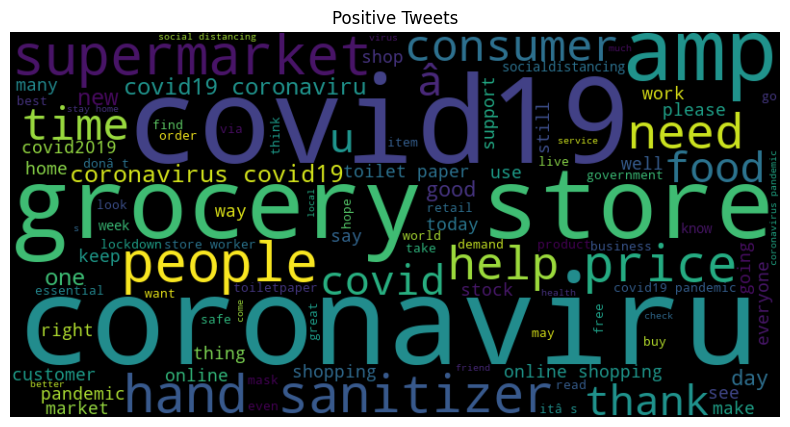

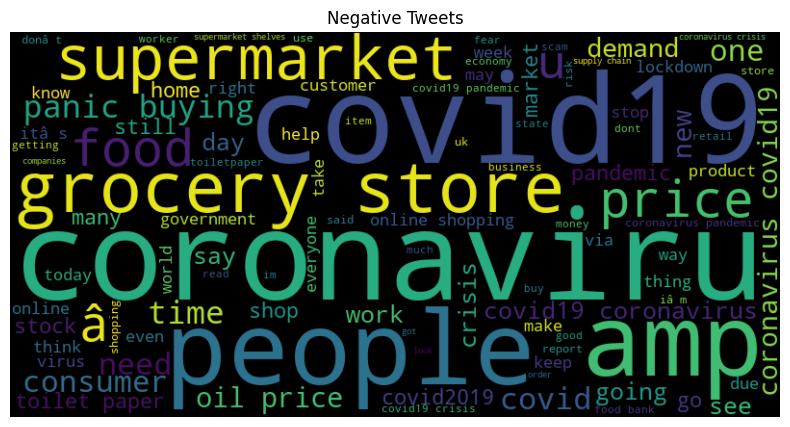

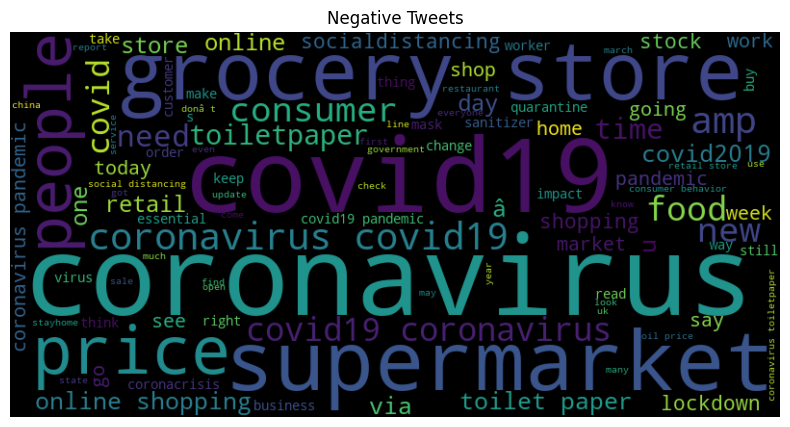

In [4]:
# Візуалізація
def plot_wordcloud(data, title):
    wc = WordCloud(width=800, height=400, max_words=100).generate(' '.join(data))
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(train_data[train_data['Sentiment'] == 'Positive']['cleaned_tweet'], 'Positive Tweets')
plot_wordcloud(train_data[train_data['Sentiment'] == 'Negative']['cleaned_tweet'], 'Negative Tweets')
plot_wordcloud(train_data[train_data['Sentiment'] == 'Neutral']['cleaned_tweet'], 'Negative Tweets')

* бачимо сіль датасету, ворд клауди не надали нам чогось значущого, класифікацію буду виконувати вже по векторизації

In [5]:
# Векторизація
tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(train_data['cleaned_tweet'])
X_test = tfidf.transform(test_data['cleaned_tweet'])

print(X_test)

  (0, 4865)	0.43659694353170536
  (0, 4597)	0.38693640050612677
  (0, 4323)	0.14061460980819135
  (0, 4232)	0.20551245596699005
  (0, 3999)	0.2812536454114751
  (0, 3972)	0.22461120896098838
  (0, 3045)	0.1801964549991275
  (0, 2950)	0.21296759977330637
  (0, 2009)	0.3804675984394228
  (0, 1509)	0.25838968086394803
  (0, 604)	0.4227941614759953
  (1, 4637)	0.4024161905104447
  (1, 3834)	0.21324922088268486
  (1, 3386)	0.1475078850630228
  (1, 3105)	0.360156532247825
  (1, 2052)	0.220836363797044
  (1, 1760)	0.2746449019923382
  (1, 1417)	0.3597906119353987
  (1, 1056)	0.40831924056564617
  (1, 1017)	0.10226760210902033
  (1, 929)	0.3471570394911474
  (1, 237)	0.2996090696284438
  (2, 3444)	0.4377663464661804
  (2, 3043)	0.5161843961667919
  (2, 2669)	0.5946601260201649
  :	:
  (3796, 4323)	0.13690333857693576
  (3796, 2931)	0.1857609146910629
  (3796, 2633)	0.22651140204087974
  (3796, 2584)	0.19144348082252127
  (3796, 2351)	0.29246733843862655
  (3796, 2106)	0.3427822313813716
  (379

Classifier: Naive Bayes
[[1196   32  405]
 [ 207   87  325]
 [ 246   16 1284]]
              precision    recall  f1-score   support

    Negative       0.73      0.73      0.73      1633
     Neutral       0.64      0.14      0.23       619
    Positive       0.64      0.83      0.72      1546

    accuracy                           0.68      3798
   macro avg       0.67      0.57      0.56      3798
weighted avg       0.68      0.68      0.64      3798

------------------------------------------------------------
Classifier: Logistic Regression
[[1292  100  241]
 [ 152  376   91]
 [ 172   58 1316]]
              precision    recall  f1-score   support

    Negative       0.80      0.79      0.80      1633
     Neutral       0.70      0.61      0.65       619
    Positive       0.80      0.85      0.82      1546

    accuracy                           0.79      3798
   macro avg       0.77      0.75      0.76      3798
weighted avg       0.78      0.79      0.78      3798

-----------

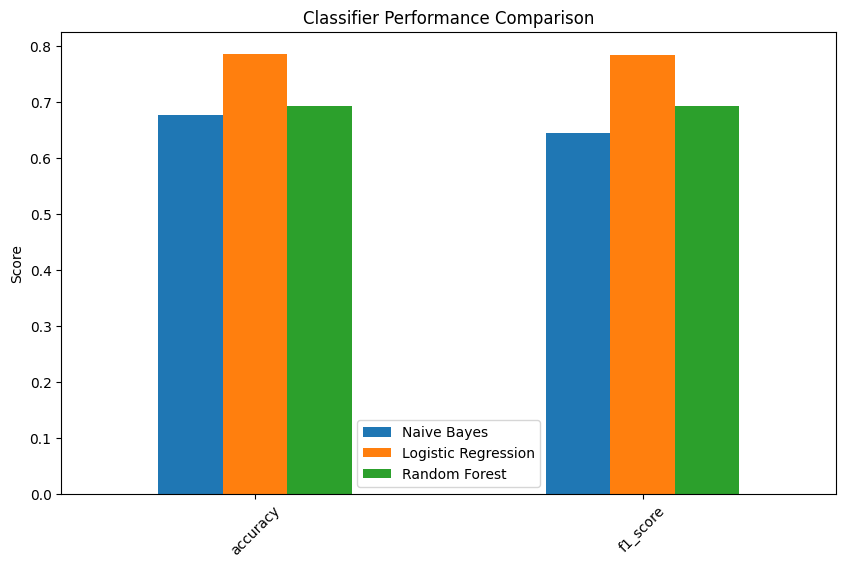

In [6]:
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier()
}

y_train = train_data['Sentiment']
y_test = test_data['Sentiment']
performance = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Оцінка та відображення різних класифікаторів
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted') 
    performance[name] = {'accuracy': accuracy, 'f1_score': f1}
    
    print(f"Classifier: {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('-' * 60)

performance_df = pd.DataFrame(performance)


performance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Classifier Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()

найкращим показала себе логістична регресія